### Created July 11 2022

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from get_stats import basketballreference_dataframe

In [2]:
data = basketballreference_dataframe(2017, 2022)  # get the data

In [3]:
stats_df = data
stats_df = stats_df.drop(["Rk", "Player", "Tm", "Unnamed: 19", "Unnamed: 24", "Year"], axis=1)
stats_df = stats_df[(stats_df["Pos"] == "PG") | (stats_df["Pos"] == "SG") | (stats_df["Pos"] == "SF") | (stats_df["Pos"] == "PF") | (stats_df["Pos"] == "C")] 

for feat in list(stats_df)[1:]:
    stats_df = stats_df.astype({feat: "float"})
    
stats_df = stats_df.dropna()
#stats_df = stats_df[stats_df["G"] >= 10]
stats_df

,Pos,Age,G,MP,PER,TS%,3PAr,FTr,ORB%,DRB%,...,TOV%,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP
0,SG,23.0,68.0,1055.0,10.1,0.560,0.724,0.144,1.9,7.1,...,8.3,15.9,1.2,0.9,2.1,0.096,-1.3,-0.4,-1.6,0.1
1,PF,26.0,38.0,558.0,11.8,0.565,0.529,0.353,3.9,18.0,...,9.7,16.8,0.5,0.5,0.9,0.082,-1.5,-0.6,-2.1,0.0
2,PF,26.0,6.0,48.0,-1.4,0.355,0.412,0.176,4.6,15.2,...,9.8,20.0,-0.2,0.0,-0.1,-0.133,-10.3,-4.1,-14.3,-0.1
3,PF,26.0,32.0,510.0,13.1,0.587,0.542,0.373,3.8,18.2,...,9.6,16.5,0.6,0.5,1.1,0.102,-0.6,-0.2,-0.9,0.1
4,C,23.0,80.0,2389.0,16.5,0.589,0.002,0.392,13.0,15.4,...,16.0,16.2,3.3,3.1,6.5,0.130,-0.2,0.0,-0.2,1.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4288,PF,33.0,26.0,475.0,15.8,0.526,0.299,0.188,8.7,18.1,...,12.4,16.0,0.5,0.8,1.3,0.127,-0.2,2.2,2.0,0.5
4289,PG,23.0,76.0,2652.0,25.4,0.603,0.395,0.358,2.1,9.6,...,14.5,34.4,9.0,1.0,10.0,0.181,7.1,-2.0,5.2,4.8
4290,C,23.0,56.0,706.0,17.4,0.546,0.045,0.247,13.9,33.0,...,13.0,19.9,0.8,1.4,2.1,0.145,-1.4,0.4,-1.0,0.2
4291,C,29.0,27.0,355.0,17.2,0.627,0.044,0.544,14.9,24.1,...,14.6,15.9,0.9,0.2,1.1,0.143,-1.2,-1.0,-2.1,0.0


In [4]:
print(stats_df.groupby('Pos')['Pos'].count())
#stats.info()

Pos
C     764
PF    821
PG    779
SF    724
SG    952
Name: Pos, dtype: int64


In [5]:
#divide the data into the input 'X' and the labels 'y'
features = list(stats_df)[1:]
#selected_features = ['Age', 'G', 'MP', 'PER', 'TS%', '3PAr', 'FTr', 'ORB%', 'DRB%', 'TRB%', 'AST%', 'STL%',
#             'BLK%', 'TOV%', 'USG%']#, 'OWS', 'DWS', 'WS', 'WS/48', 'OBPM', 'DBPM','BPM', 'VORP']
X        = stats_df[features] #the observations
y        = stats_df['Pos'] #the label

In [6]:
def knn_model(X, y):
    """Create a knn model"""
    # split the data into training and test sets
    X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=6, stratify = y)
    # Enter appropriate values to partition data, and ensure results are reproducible and obtain stratified samples

    sc = StandardScaler()
    sc.fit(X_train)
    X_train_std, X_test_std = sc.transform(X_train), sc.transform(X_test)  
    knn = KNeighborsClassifier()
    
    # use grid search to find optimal value for k
    params = {"n_neighbors": list(range(1,50))}  # for grid search
    grid = GridSearchCV(knn, params)
    grid.fit(X_train_std, y_train)
    best_k = grid.best_params_["n_neighbors"]
    print(f"Optimal k value: {best_k}")
    
    # feature selection (select important featues)
    #knn = KNeighborsClassifier(n_neighbors=best_k)
    #sfs = SequentialFeatureSelector(knn, n_features_to_select=num_features)
    #sfs.fit(X_train_std, y_train)
    #selected_features = list(sfs.get_feature_names_out())
    #print(selected_features)
    #X_train_std, X_test_std = sfs.transform(X_train_std), sfs.transform(X_test_std)

    # build model with optimal value for k
    knn = KNeighborsClassifier(n_neighbors=best_k)
    knn.fit(X_train_std, y_train)
    
    # cross validation
    scores = cross_val_score(knn, X_train_std, y_train, cv=5)
    print(f"Mean Validation accuracy: {scores.mean()}")
    #print(f"Validation accuracy std : {scores.std()}")
    
    # evaluate using test data
    y_pred = knn.predict(X_test_std)
    print(f"Test data accuracy      : {knn.score(X_test_std, y_test)}")
    print("\n", classification_report(y_test, y_pred))
    return

knn_model(stats_df[features], stats_df["Pos"])

Optimal k value: 19
Mean Validation accuracy: 0.6018374558303886
Test data accuracy      : 0.6047854785478548

               precision    recall  f1-score   support

           C       0.73      0.78      0.76       229
          PF       0.54      0.45      0.49       246
          PG       0.71      0.73      0.72       234
          SF       0.45      0.37      0.40       217
          SG       0.56      0.67      0.61       286

    accuracy                           0.60      1212
   macro avg       0.60      0.60      0.60      1212
weighted avg       0.60      0.60      0.60      1212



In [7]:
def kNearest(i, X_train, X_test, y_train, y_test):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    return (i, knn.score(X_test, y_test) * 100) # The accuracy of the model

def kNN_Model(X, y, display=False, report=False):
    """Return the optimal value of k and the max accuracy"""
    # split the data into training and test sets
    X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=6, stratify = y)
    # Enter appropriate values to partition data, and ensure results are reproducible and obtain stratified samples
    
    # feature scaling
    sc = StandardScaler()
    sc.fit(X_train)
    X_train_std, X_test_std = sc.transform(X_train), sc.transform(X_test)    
    
    # build the k-nn model, experiment with different values of k
    accuracy_scores = [ kNearest(i, X_train_std, X_test_std, y_train, y_test) for i in range(1,50)]
    max_accuracy = max([e[1] for e in accuracy_scores])
    
    best = [t for t in accuracy_scores if t[1] == max_accuracy]
    best = min([x[0] for x in best])
    acc = pd.DataFrame({'k': [e[0] for e in accuracy_scores], 'accuracy': [e[1] for e in accuracy_scores]})
    
    # plot the results
    if display:
        lines = acc.plot.line(x = 'k')
    
    knn = KNeighborsClassifier(n_neighbors=best) 
    knn.fit(X_train_std, y_train)
    y_pred=knn.predict(X_test_std)
    
    # show the results
    if report:
        print(classification_report(y_test, y_pred))
    return best, max_accuracy

              precision    recall  f1-score   support

           C       0.73      0.78      0.76       229
          PF       0.54      0.45      0.49       246
          PG       0.71      0.73      0.72       234
          SF       0.45      0.37      0.40       217
          SG       0.56      0.67      0.61       286

    accuracy                           0.60      1212
   macro avg       0.60      0.60      0.60      1212
weighted avg       0.60      0.60      0.60      1212



(19, 60.47854785478548)

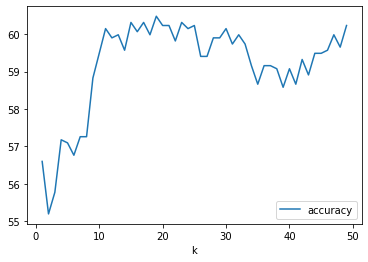

In [8]:
kNN_Model(X, y, display=True, report=True)